In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [194]:
data = pd.read_csv('/content/shopping_behavior.csv', header=None, sep=',')
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
1,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
2,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
3,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3897,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3898,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3899,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [195]:
data.columns = ['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
                'Location', 'Size', 'Color','Season',
                'Review Rating', 'Subscription Status', 'Shipping Type', 'Discount Applied',
                'Promo Code Used', 'Previous Purchases', 'Payment Method', 'Frequency of Purchases',]

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3901 entries, 0 to 3900
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Customer ID             3901 non-null   object
 1   Age                     3901 non-null   object
 2   Gender                  3901 non-null   object
 3   Item Purchased          3901 non-null   object
 4   Category                3901 non-null   object
 5   Purchase Amount (USD)   3901 non-null   object
 6   Location                3901 non-null   object
 7   Size                    3901 non-null   object
 8   Color                   3901 non-null   object
 9   Season                  3901 non-null   object
 10  Review Rating           3901 non-null   object
 11  Subscription Status     3901 non-null   object
 12  Shipping Type           3901 non-null   object
 13  Discount Applied        3901 non-null   object
 14  Promo Code Used         3901 non-null   object
 15  Prev

In [197]:
data = data.drop(0)
data.reset_index(drop=True, inplace=True)
data


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [198]:
data.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [199]:
data.tail(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


In [200]:
data.duplicated().sum()

np.int64(0)

In [201]:
data.describe()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,3900,53,2,25,4,81,50,4,25,4,26,2,6,2,2,50,6,7
top,3900,69,Male,Blouse,Clothing,36,Montana,M,Olive,Spring,3.4,No,Free Shipping,No,No,31,PayPal,Every 3 Months
freq,1,88,2652,171,1737,62,96,1755,177,999,182,2847,675,2223,2223,97,677,584


In [202]:
data['Item Purchased'].nunique()

25

In [203]:
data['Purchase Amount (USD)'] = pd.to_numeric(data['Purchase Amount (USD)'], errors='coerce')
season_avg = data.groupby('Season')['Purchase Amount (USD)'].mean().reset_index()


In [204]:
numeric_data = data[[
    'Age',
    'Purchase Amount (USD)',
    'Review Rating',
    'Previous Purchases'
]]
corr = numeric_data.corr()
corr

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Age,1.000000,-0.010424,-0.021949,0.040445
Purchase Amount (USD),-0.010424,1.000000,0.030776,0.008063
Review Rating,-0.021949,0.030776,1.000000,0.004229
Previous Purchases,0.040445,0.008063,0.004229,1.000000


#Графики

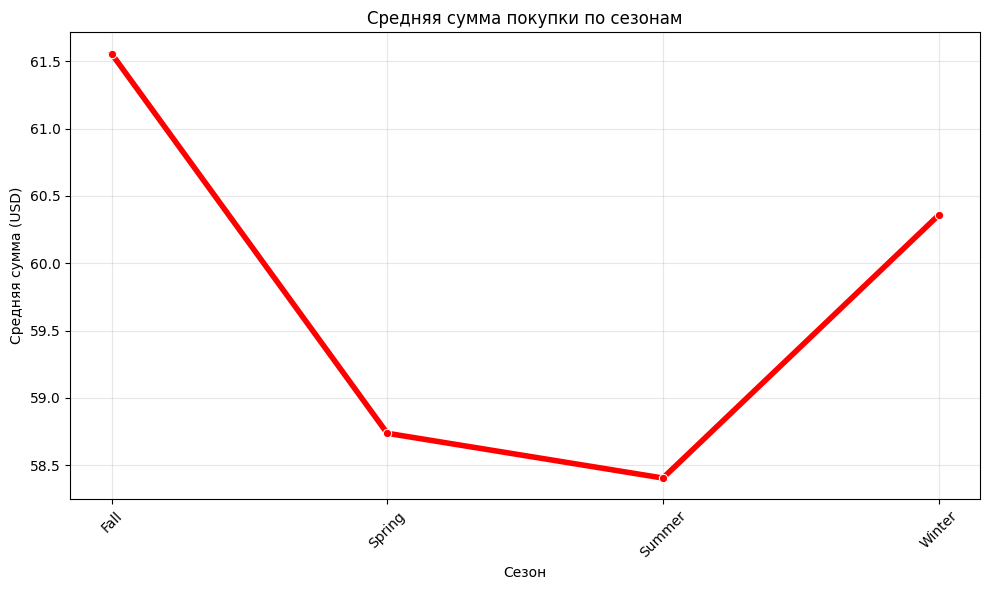

In [205]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=season_avg, x='Season', y='Purchase Amount (USD)', marker='o', linewidth=4, color='red')
plt.title('Средняя сумма покупки по сезонам')
plt.xlabel('Сезон')
plt.ylabel('Средняя сумма (USD)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

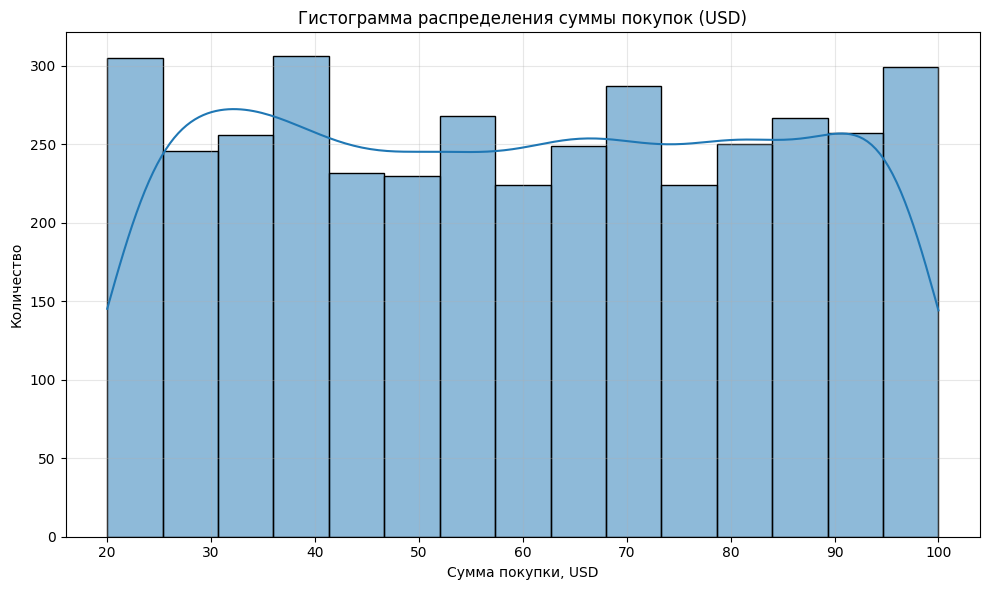

In [206]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Purchase Amount (USD)'],  kde=True)
plt.title('Гистограмма распределения суммы покупок (USD)')
plt.xlabel('Сумма покупки, USD')
plt.ylabel('Количество' )
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

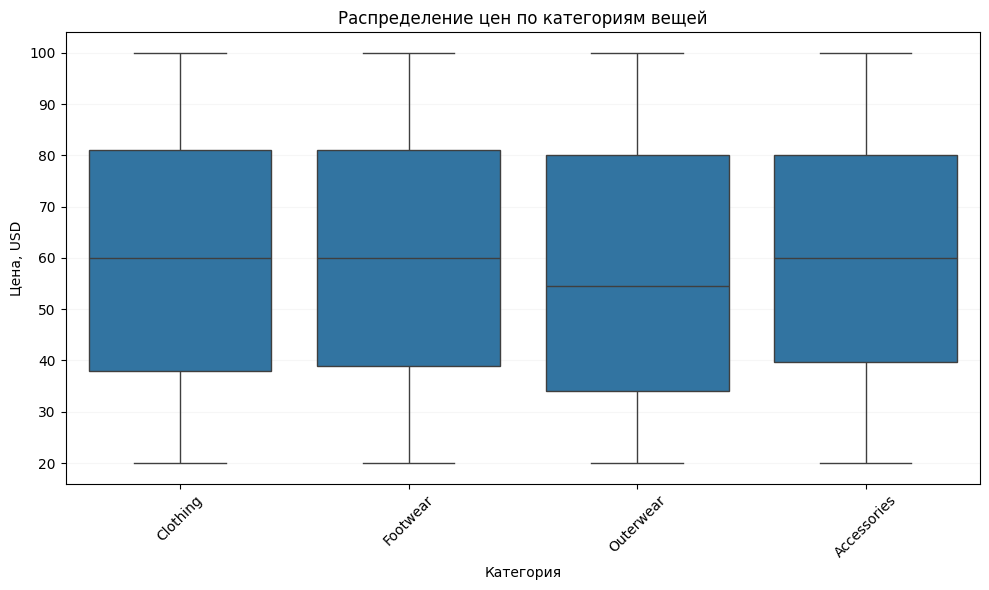

In [207]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Category', y='Purchase Amount (USD)')
plt.title('Распределение цен по категориям вещей')
plt.xlabel('Категория')
plt.ylabel('Цена, USD')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.1)
plt.tight_layout()
plt.show()

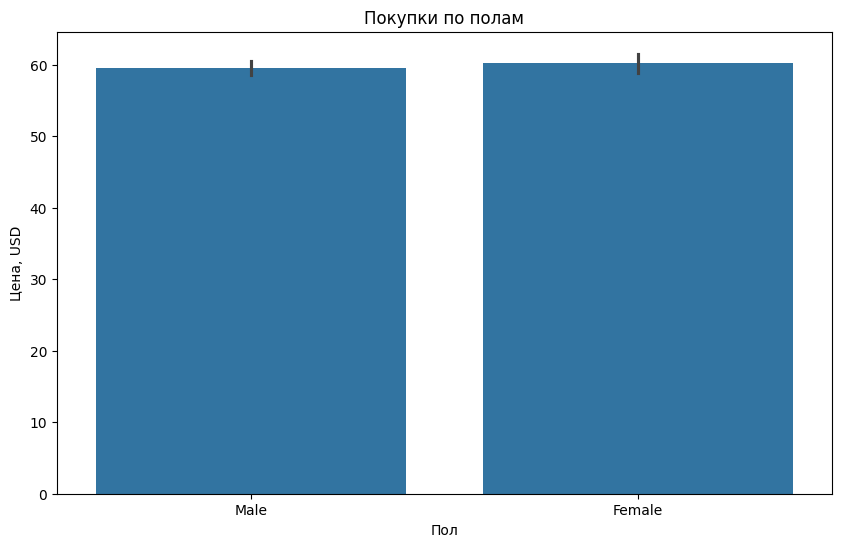

In [208]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data['Gender'], y=data['Purchase Amount (USD)'])
plt.title('Покупки по полам')
plt.xlabel('Пол')
plt.ylabel('Цена, USD')
plt.show()

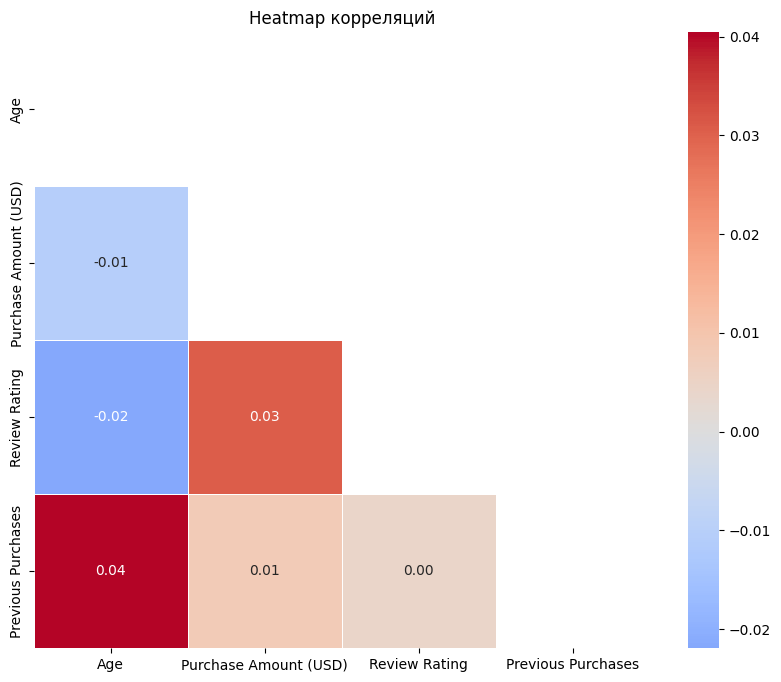

In [209]:
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    square=True
)

plt.title("Heatmap корреляций")
plt.xticks()
plt.yticks()

plt.show()

#Группировка


###Выручка по штату(суммирование)

In [210]:
total_spent_by_location = (
    data.groupby("Location")["Purchase Amount (USD)"].sum().reset_index().sort_values(by="Purchase Amount (USD)", ascending=False)
)

total_spent_by_location.head(5)

,Location,Purchase Amount (USD)
25,Montana,5784
12,Illinois,5617
4,California,5605
11,Idaho,5587
27,Nevada,5514


###По полу в разные сезоны(подсчёт количества)

In [211]:
count_by_gender_season = (
    data.groupby(["Gender", "Season"]).size().reset_index(name="Purchase Count")
)

count_by_gender_season.head(5)

,Gender,Season,Purchase Count
0,Female,Fall,328
1,Female,Spring,316
2,Female,Summer,298
3,Female,Winter,306
4,Male,Fall,647


###По категории(среднее / медиана по группам)

In [212]:
avg_median_by_category = (
    data.groupby("Category")["Purchase Amount (USD)"].agg(["mean", "median"]).reset_index()
)

avg_median_by_category.head(5)

,Category,mean,median
0,Accessories,59.838710,60.0
1,Clothing,60.025331,60.0
2,Footwear,60.255426,60.0
3,Outerwear,57.172840,54.5
